In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ezc3d import c3d
from scipy.signal import resample
from scipy.io import loadmat, savemat
from joblib import load, dump
from tqdm import tqdm
from scipy.signal import butter, lfilter

In [2]:
PATH_DATASETS = '../../Dataset/'
PATH_DATASET_2 = 'gait-dbase-2/'

N_SAMPLES = 1024
FORCE_THRESHOLD = 20
TOE_HEIGTH_THRESHOLD = 40

In [3]:
class GrfFilter(object): 
    @staticmethod
    def butter_lowpass(cutoff, fs, order):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def apply(data, cutoff=10, fs=2000, order=2):
        b, a = GrfFilter.butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        y = y - np.median(y)
        return y

In [4]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

def require_positive(x):
    if x < 0:
        return 0
    else:
        return x

def clip_overflow(x, max=N_SAMPLES):
    if x >= max:
        return N_SAMPLES - 1
    else:
        return x

In [49]:
path = os.path.join(PATH_DATASETS, PATH_DATASET_2)
subjects = os.listdir(path)

features = pd.DataFrame()
target = pd.DataFrame()

records = []
n_samples = 0
n_bad_samples = 0

for subject in tqdm(subjects):
    velocities_path = os.path.join(path, subject, 'Raw_Data')
    velocities = os.listdir(velocities_path)

    for velocity in velocities:

        files_path = os.path.join(velocities_path, velocity)
        files = os.listdir(files_path)

        for filename in files:
            try:
                content = c3d(os.path.join(files_path, filename), extract_forceplat_data=True)
            
                trajectory_x_r = content['data']['points'][0, 6:11, :]
                trajectory_y_r = content['data']['points'][1, 6:11, :]
                trajectory_z_r = content['data']['points'][2, 6:11, :]

                trajectory_x_l = content['data']['points'][0, 18:23, :]
                trajectory_y_l = content['data']['points'][1, 18:23, :]
                trajectory_z_l = content['data']['points'][2, 18:23, :]

                trajectory_x_r = resample(trajectory_x_r, N_SAMPLES, axis=1).T
                trajectory_y_r = resample(trajectory_y_r, N_SAMPLES, axis=1).T
                trajectory_z_r = resample(trajectory_z_r, N_SAMPLES, axis=1).T

                trajectory_x_l = resample(trajectory_x_l, N_SAMPLES, axis=1).T
                trajectory_y_l = resample(trajectory_y_l, N_SAMPLES, axis=1).T
                trajectory_z_l = resample(trajectory_z_l, N_SAMPLES, axis=1).T

                # ...................... Force X ...........................

                # force_x_1 = content['data']['platform'][0]['force'][0, :]
                force_x_2 = content['data']['platform'][1]['force'][0, :]
                force_x_3 = content['data']['platform'][2]['force'][0, :]
                force_x_4 = content['data']['platform'][3]['force'][0, :]
                force_x_5 = content['data']['platform'][4]['force'][0, :]
                # force_x_6 = content['data']['platform'][5]['force'][0, :]

                # force_x_1 = GrfFilter.apply(force_x_1)
                force_x_2 = GrfFilter.apply(force_x_2)
                force_x_3 = GrfFilter.apply(force_x_3)
                force_x_4 = GrfFilter.apply(force_x_4)
                force_x_5 = GrfFilter.apply(force_x_5)
                # force_x_6 = GrfFilter.apply(force_x_6)

                # force_x_1 = resample(force_x_1, N_SAMPLES, axis=0).T
                force_x_2 = resample(force_x_2, N_SAMPLES, axis=0).T
                force_x_3 = resample(force_x_3, N_SAMPLES, axis=0).T
                force_x_4 = resample(force_x_4, N_SAMPLES, axis=0).T
                force_x_5 = resample(force_x_5, N_SAMPLES, axis=0).T
                # force_x_6 = resample(force_x_6, N_SAMPLES, axis=0).T

                # ..................... Force Y ...........................

                # force_y_1 = content['data']['platform'][0]['force'][1, :]
                force_y_2 = content['data']['platform'][1]['force'][1, :]
                force_y_3 = content['data']['platform'][2]['force'][1, :]
                force_y_4 = content['data']['platform'][3]['force'][1, :]
                force_y_5 = content['data']['platform'][4]['force'][1, :]
                # force_y_6 = content['data']['platform'][5]['force'][1, :]

                # force_y_1 = GrfFilter.apply(force_y_1)
                force_y_2 = GrfFilter.apply(force_y_2)
                force_y_3 = GrfFilter.apply(force_y_3)
                force_y_4 = GrfFilter.apply(force_y_4)
                force_y_5 = GrfFilter.apply(force_y_5)
                # force_y_6 = GrfFilter.apply(force_y_6)

                # force_y_1 = resample(force_y_1, N_SAMPLES, axis=0).T
                force_y_2 = resample(force_y_2, N_SAMPLES, axis=0).T
                force_y_3 = resample(force_y_3, N_SAMPLES, axis=0).T
                force_y_4 = resample(force_y_4, N_SAMPLES, axis=0).T
                force_y_5 = resample(force_y_5, N_SAMPLES, axis=0).T
                # force_y_6 = resample(force_y_6, N_SAMPLES, axis=0).T

                # ....................... Force Z ............................

                # force_z_1 = content['data']['platform'][0]['force'][2, :]
                force_z_2 = content['data']['platform'][1]['force'][2, :]
                force_z_3 = content['data']['platform'][2]['force'][2, :]
                force_z_4 = content['data']['platform'][3]['force'][2, :]
                force_z_5 = content['data']['platform'][4]['force'][2, :]
                # force_z_6 = content['data']['platform'][5]['force'][2, :]

                # force_z_1 = GrfFilter.apply(force_z_1)
                force_z_2 = GrfFilter.apply(force_z_2)
                force_z_3 = GrfFilter.apply(force_z_3)
                force_z_4 = GrfFilter.apply(force_z_4)
                force_z_5 = GrfFilter.apply(force_z_5)
                # force_z_6 = GrfFilter.apply(force_z_6)

                # force_z_1 = resample(force_z_1, N_SAMPLES, axis=0).T
                force_z_2 = resample(force_z_2, N_SAMPLES, axis=0).T
                force_z_3 = resample(force_z_3, N_SAMPLES, axis=0).T
                force_z_4 = resample(force_z_4, N_SAMPLES, axis=0).T
                force_z_5 = resample(force_z_5, N_SAMPLES, axis=0).T
                # force_z_6 = resample(force_z_6, N_SAMPLES, axis=0).T

                # ... Remove all zero GRF samples
                if np.mean(force_z_2) <= FORCE_THRESHOLD or np.mean(force_z_3) <= FORCE_THRESHOLD \
                    or np.mean(force_z_4) <= FORCE_THRESHOLD or np.mean(force_z_5) <= FORCE_THRESHOLD:
                    n_bad_samples = n_bad_samples + 1
                    continue

                grf_combined_x_r = force_x_2 + force_x_4
                grf_combined_x_l = force_x_3 + force_x_5
                grf_combined_y_r = force_y_2 + force_y_4
                grf_combined_y_l = force_y_3 + force_y_5
                grf_combined_z_r = force_z_2 + force_z_4
                grf_combined_z_l = force_z_3 + force_z_5

                grf_mask_r = (grf_combined_z_r >= FORCE_THRESHOLD)
                grf_mask_l = (grf_combined_z_l >= FORCE_THRESHOLD)

                grf_start_r = np.min(np.argwhere(grf_mask_r == True))
                grf_end_r = np.max(np.argwhere(grf_mask_r == True))
                grf_start_l = np.min(np.argwhere(grf_mask_l == True))
                grf_end_l = np.max(np.argwhere(grf_mask_l == True))

                swing_period_r = np.sum(grf_combined_z_r[grf_start_r:grf_end_r] <= FORCE_THRESHOLD)
                swing_period_l = np.sum(grf_combined_z_l[grf_start_l:grf_end_l] <= FORCE_THRESHOLD)

                roi_start_r = require_positive(grf_start_r - swing_period_r)
                roi_end_r = clip_overflow(grf_end_r + swing_period_r)

                roi_start_l = require_positive(grf_start_l - swing_period_l)
                roi_end_l = clip_overflow(grf_end_l + swing_period_l)

                trajectory_x_r = trajectory_x_r[roi_start_l:roi_end_l]
                trajectory_x_l = trajectory_x_l[roi_start_r:roi_end_r]
                trajectory_y_r = trajectory_y_r[roi_start_l:roi_end_l]
                trajectory_y_l = trajectory_y_l[roi_start_r:roi_end_r]
                trajectory_z_r = trajectory_z_r[roi_start_l:roi_end_l]
                trajectory_z_l = trajectory_z_l[roi_start_r:roi_end_r]

                force_x_r = grf_combined_x_r[roi_start_r:roi_end_r]
                force_x_l = grf_combined_x_l[roi_start_l:roi_end_l]
                force_y_r = grf_combined_y_r[roi_start_r:roi_end_r]
                force_y_l = grf_combined_y_l[roi_start_l:roi_end_l]
                force_z_r = grf_combined_z_r[roi_start_r:roi_end_r]
                force_z_l = grf_combined_z_l[roi_start_l:roi_end_l]

                trajectory_x_r = resample(trajectory_x_r, N_SAMPLES, axis=0)
                trajectory_x_l = resample(trajectory_x_l, N_SAMPLES, axis=0)
                trajectory_y_r = resample(trajectory_y_r, N_SAMPLES, axis=0)
                trajectory_y_l = resample(trajectory_y_l, N_SAMPLES, axis=0)
                trajectory_z_r = resample(trajectory_z_r, N_SAMPLES, axis=0)
                trajectory_z_l = resample(trajectory_z_l, N_SAMPLES, axis=0)

                force_x_r = resample(force_x_r, N_SAMPLES, axis=0)
                force_x_l = resample(force_x_l, N_SAMPLES, axis=0)
                force_y_r = resample(force_y_r, N_SAMPLES, axis=0)
                force_y_l = resample(force_y_l, N_SAMPLES, axis=0)
                force_z_r = resample(force_z_r, N_SAMPLES, axis=0)
                force_z_l = resample(force_z_l, N_SAMPLES, axis=0)

                # ... Standardize
                trajectory_x_r = standardize(trajectory_x_r)
                trajectory_x_l = standardize(trajectory_x_l)
                trajectory_y_r = standardize(trajectory_y_r)
                trajectory_y_l = standardize(trajectory_y_l)
                trajectory_z_r = standardize(trajectory_z_r)
                trajectory_z_l = standardize(trajectory_z_l)

                force_x_r = standardize(force_x_r)
                force_x_l = standardize(force_x_l)
                force_y_r = standardize(force_y_r)
                force_y_l = standardize(force_y_l)
                force_z_r = standardize(force_z_r)
                force_z_l = standardize(force_z_l)


                _features_l = pd.DataFrame(
                    np.concatenate([trajectory_x_l, trajectory_y_l, trajectory_z_l], axis=1),
                    columns=[
                        '7_x', '8_x', '9_x', '10_x', '11_x',
                        '7_y', '8_y', '9_y', '10_y', '11_y',
                        '7_z', '8_z', '9_z', '10_z', '11_z'
                    ]
                )

                _features_r = pd.DataFrame(
                    np.concatenate([trajectory_x_r, trajectory_y_r, trajectory_z_r], axis=1),
                    columns=[
                        '7_x', '8_x', '9_x', '10_x', '11_x',
                        '7_y', '8_y', '9_y', '10_y', '11_y',
                        '7_z', '8_z', '9_z', '10_z', '11_z'
                    ]
                )

                _features = pd.concat([_features_l, _features_r], axis=0)

                _target_r = pd.DataFrame(
                    np.stack([force_x_r, force_y_r, force_z_r], axis=1),
                    columns=['fx', 'fy', 'fz']
                )

                _target_l = pd.DataFrame(
                    np.stack([force_x_l, force_y_l, force_z_l], axis=1),
                    columns=['fx', 'fy', 'fz']
                )

                _target = pd.concat([_target_r, _target_l], axis=0)

                features = pd.concat([features, _features], axis=0, ignore_index=True)
                target = pd.concat([target, _target], axis=0, ignore_index=True)

                records.append(filename)

                n_samples = n_samples + 1

            except Exception as e:
                print(f'ERROR [{subject}/{velocity}/{filename}]: {e}')
                n_bad_samples = n_bad_samples + 1
                pass

            # break
        break
    break

print('Number of good samples: ', n_samples)
print('Number of bad samples: ', n_bad_samples)

  0%|          | 0/16 [00:10<?, ?it/s]

Number of good samples:  10
Number of bad samples:  0


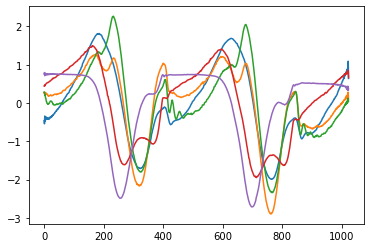

In [51]:
# plt.plot(force_x_r)
plt.plot(-trajectory_z_r)
# plt.plot(-np.gradient(trajectory_y_r, axis=1))

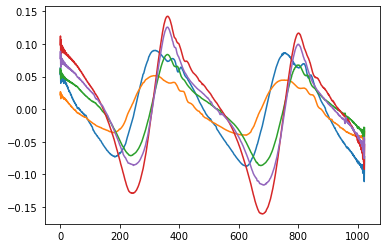

In [25]:
plt.plot(np.gradient(trajectory_y_r, axis=1))

In [ ]:
features

In [ ]:
target

In [ ]:
path = '../../Dataset/Processed/data2.joblib'
data = {
    'X': features,
    'y': target
}
# dump(data, path)

<h1 align="center">Verification</h1>

In [ ]:
path = '../../Dataset/Processed/data2.joblib'
data = load(path)

features = data['X']
target = data['y']

IndexError: index 20 is out of bounds for axis 0 with size 20

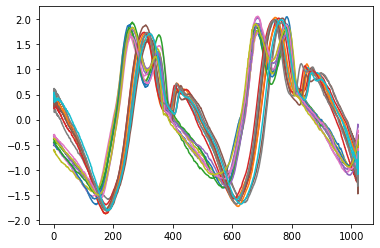

In [52]:
x = features['7_z'].to_numpy().reshape(-1, N_SAMPLES)
for i in range(x.shape[1]):
    plt.plot(x[i, :])

In [ ]:
y = target['fx'].to_numpy().reshape(-1, N_SAMPLES)
for i in range(100, 105):
    plt.plot(np.abs(y[i, :]))

In [ ]:
path = '../../Dataset/gait-dbase-2/Participant14/Raw_Data/V35/T4.c3d'
content = c3d(path, extract_forceplat_data=True)
force_z_1 = content['data']['platform'][0]['force'][2, :]
force_z_2 = content['data']['platform'][1]['force'][2, :]
force_z_3 = content['data']['platform'][2]['force'][2, :]
force_z_4 = content['data']['platform'][3]['force'][2, :]
force_z_5 = content['data']['platform'][4]['force'][2, :]
force_z_6 = content['data']['platform'][5]['force'][2, :]
# trajectory_z_l = content['data']['points'][2, 9:15, :]
# trajectory_z_r = content['data']['points'][2, 20:26, :]
trajectory_z_r = content['data']['points'][2, 6:11, :]
trajectory_z_l = content['data']['points'][2, 18:23, :]

# clean_grf = GrfFilter.apply(force_z_2)
plt.figure(figsize=(9, 4))
# plt.plot(force_z_1, label='Force plate 1')
plt.plot(force_z_2, label='Right 1')
# plt.plot(force_z_3, label='Left 1')
plt.plot(force_z_4, label='Right 2')
# plt.plot(force_z_5, label='Left 2')
# plt.plot(force_z_6, label='Force plate 6')
# plt.plot(trajectory_z_l.T)

plt.legend()